In [9]:
import csv
with open('IBB_holdings.csv', 'r') as csvfile:
    file = csv.reader(csvfile,delimiter=' ')
    c=0
    list_tickers=[]
    for row in file:
        if c>=11:
            list_tickers.append(row[0].split(',')[0])
        c+=1
            
csvfile.close()

In [10]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import pandas_datareader.data as web
import datetime

matplotlib.rcParams[ 'figure.figsize' ] = ( 14, 6 )

In [11]:
symbol = 'WIKI/NSTG'
date=datetime.date
df = web.DataReader(symbol, 'quandl', '2015-01-01', str(date.today()))
df.head()



,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-02-06,6.54,6.83,6.50,6.80,120322.0,0.0,1.0,6.54,6.83,6.50,6.80,120322.0
2018-02-05,6.91,7.02,6.54,6.71,132698.0,0.0,1.0,6.91,7.02,6.54,6.71,132698.0
2018-02-02,7.18,7.36,6.94,6.95,119567.0,0.0,1.0,7.18,7.36,6.94,6.95,119567.0
2018-02-01,7.49,7.55,7.07,7.24,138886.0,0.0,1.0,7.49,7.55,7.07,7.24,138886.0
2018-01-31,7.99,7.99,7.50,7.52,67982.0,0.0,1.0,7.99,7.99,7.50,7.52,67982.0


In [12]:
df.tail()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2015-01-08,13.37,13.500,12.88,13.09,54773.0,0.0,1.0,13.37,13.500,12.88,13.09,54773.0
2015-01-07,13.85,13.850,12.97,13.37,51169.0,0.0,1.0,13.85,13.850,12.97,13.37,51169.0
2015-01-06,14.32,14.446,13.36,13.69,56461.0,0.0,1.0,14.32,14.446,13.36,13.69,56461.0
2015-01-05,13.94,14.740,13.94,14.20,72237.0,0.0,1.0,13.94,14.740,13.94,14.20,72237.0
2015-01-02,13.99,14.240,13.33,13.86,55970.0,0.0,1.0,13.99,14.240,13.33,13.86,55970.0


In [13]:
# filter on one day of data
day = df[ '2018-01-19' ]

In [14]:
# let's flip the time series
df_flipped = df.sort_index( ascending=True )

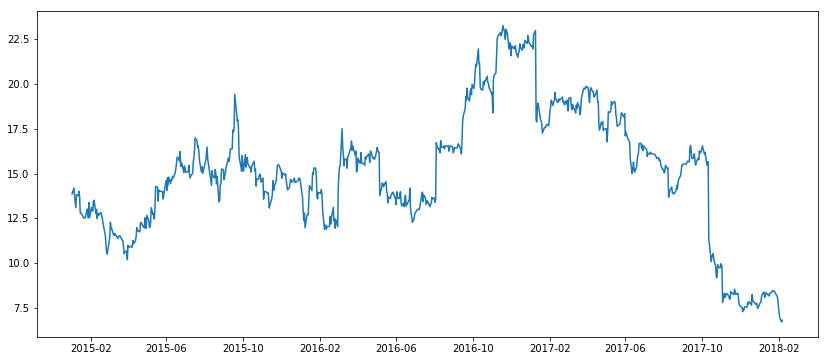

In [15]:
#plot a single series
plt.plot( df[ 'Close' ] )
# or multiple
#plt.plot( day[ ['High', 'Low' ] ] )

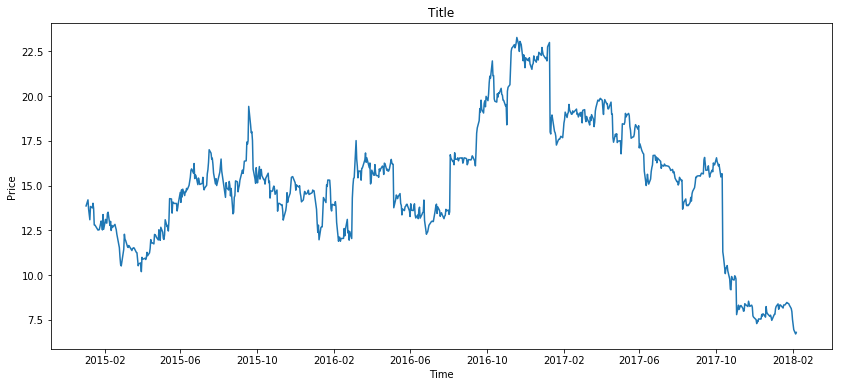

In [16]:
# maybe with some labels 
plt.plot( df[ 'Close' ] )
plt.title( 'Title' )
plt.xlabel( 'Time' )
plt.ylabel( 'Price' )

<Container object of 779 artists>

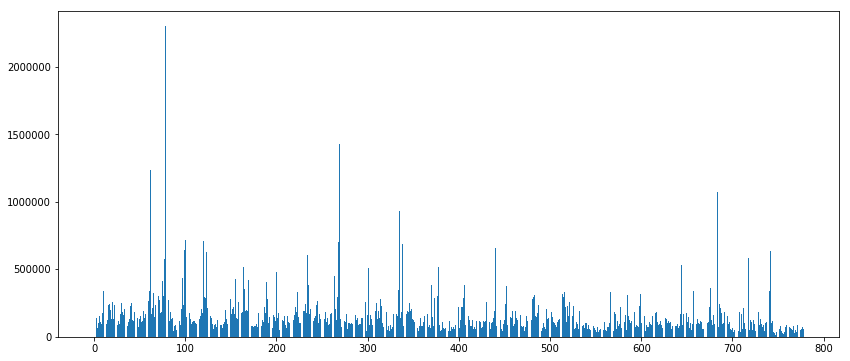

In [17]:
#Volume chart
xaxis = np.arange( len(df['Volume']) )
plt.bar( xaxis , df[ 'Volume' ] )

<Container object of 779 artists>

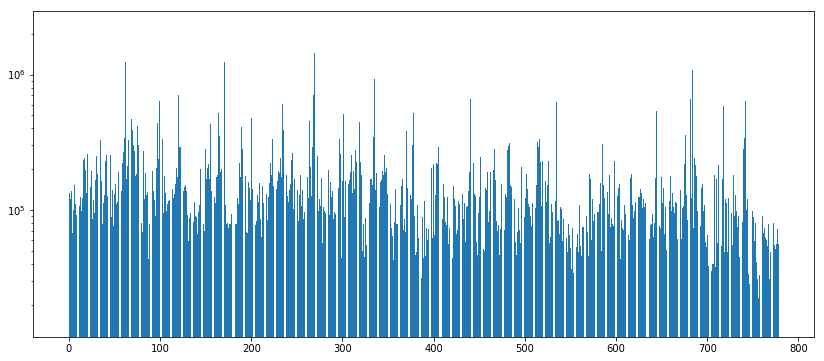

In [18]:
# Maybe use log?
plt.bar( xaxis, df[ 'Volume' ], log=True )

<Container object of 779 artists>

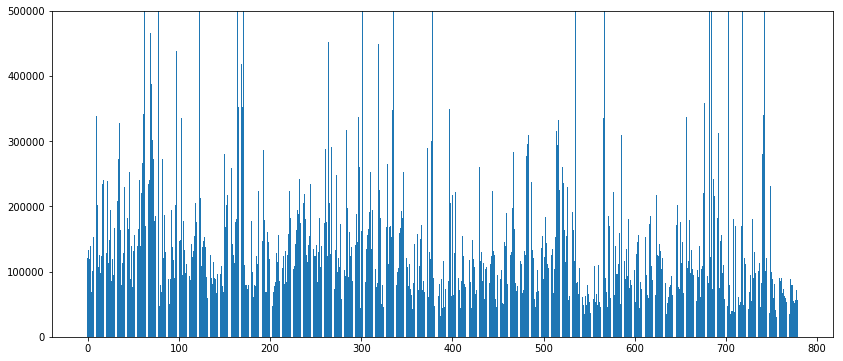

In [19]:
# or maybe filter?
plt.ylim( 0, 500000 )
plt.bar( xaxis, df[ 'Volume' ] )

In [20]:
#On Quandl
compt_succ=0
compt_echec=0
list_dataframes=[]
date=datetime.date
for i in range (len(list_tickers)-2):
    symbol = 'WIKI/'+list_tickers[i]
    try:
        df = web.DataReader(symbol, 'quandl', '2016-01-01', str(date.today()))
        list_dataframes.append(df)
        compt_succ+=1
    except:
        print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])
        compt_echec+=1
print(compt_succ,compt_echec)

    

Oops!  That was no valid ticker.  Try again... BIVV
Oops!  That was no valid ticker.  Try again... JUNO
Oops!  That was no valid ticker.  Try again... SHPG
Oops!  That was no valid ticker.  Try again... JAZZ
Oops!  That was no valid ticker.  Try again... SAGE
Oops!  That was no valid ticker.  Try again... IONS
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... FGEN
Oops!  That was no valid ticker.  Try again... AVXS
Oops!  That was no valid ticker.  Try again... SYNH
Oops!  That was no valid ticker.  Try again... BGNE
Oops!  That was no valid ticker.  Try again... GRFS
Oops!  That was no valid ticker.  Try again... BPMC
Oops!  That was no valid ticker.  Try again... GWPH
Oops!  That was no valid ticker.  Try again... LOXO
Oops!  That was no valid ticker.  Try again... GBT
Oops!  That was no valid ticker.  Try again... ANAB
Oops!  That was no valid ticker.  Try again... CBPO
Oops!  That was no valid ticker.  Try again... ONCE
Oops!  That w

In [16]:
#On Yahoo
compt_succ=0
compt_echec=0
list_dataframes=[]
date=datetime.date
for i in range (len(list_tickers)-2):
    symbol = list_tickers[i]
    try:
        df = web.DataReader(symbol, 'yahoo', '2016-01-01', str(date.today()))
        list_dataframes.append(df)
        compt_succ+=1
    except:
        print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])
        compt_echec+=1
print(compt_succ,compt_echec)

Oops!  That was no valid ticker.  Try again... ILMN
Oops!  That was no valid ticker.  Try again... INCY
Oops!  That was no valid ticker.  Try again... SRPT
Oops!  That was no valid ticker.  Try again... GWPH
Oops!  That was no valid ticker.  Try again... XLRN
Oops!  That was no valid ticker.  Try again... ESPR
Oops!  That was no valid ticker.  Try again... PCRX
Oops!  That was no valid ticker.  Try again... ENDP
Oops!  That was no valid ticker.  Try again... RGEN
Oops!  That was no valid ticker.  Try again... PTCT
Oops!  That was no valid ticker.  Try again... ITCI
Oops!  That was no valid ticker.  Try again... GLYC
Oops!  That was no valid ticker.  Try again... COLL
Oops!  That was no valid ticker.  Try again... RIGL
Oops!  That was no valid ticker.  Try again... FPRX
Oops!  That was no valid ticker.  Try again... KPTI
Oops!  That was no valid ticker.  Try again... ADAP
Oops!  That was no valid ticker.  Try again... CORI
Oops!  That was no valid ticker.  Try again... BLKFDS
Oops!  Tha

In [12]:
#On Yahoo bis
compt_succ=0
compt_echec=0
list_dataframes=[]
date=datetime.date.today()
date=str(date.year)+'-'+str(date.month)+'-'+str(date.day-3)
for i in range (len(list_tickers)-2):
    symbol = list_tickers[i]
    try:
        df = web.DataReader(symbol, 'yahoo', '2016-01-01', date)
        list_dataframes.append(df)
        compt_succ+=1
    except:
        print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])
        compt_echec+=1
print(compt_succ,compt_echec)

Oops!  That was no valid ticker.  Try again... GILD
Oops!  That was no valid ticker.  Try again... REGN
Oops!  That was no valid ticker.  Try again... SAGE
Oops!  That was no valid ticker.  Try again... NBIX
Oops!  That was no valid ticker.  Try again... ARRY
Oops!  That was no valid ticker.  Try again... FMI
Oops!  That was no valid ticker.  Try again... ONCE
Oops!  That was no valid ticker.  Try again... AERI
Oops!  That was no valid ticker.  Try again... ZGNX
Oops!  That was no valid ticker.  Try again... GLPG
Oops!  That was no valid ticker.  Try again... IMGN
Oops!  That was no valid ticker.  Try again... ACOR
Oops!  That was no valid ticker.  Try again... XNCR
Oops!  That was no valid ticker.  Try again... ADMS
Oops!  That was no valid ticker.  Try again... EGRX
Oops!  That was no valid ticker.  Try again... SCMP
Oops!  That was no valid ticker.  Try again... FLXN
Oops!  That was no valid ticker.  Try again... DOVA
Oops!  That was no valid ticker.  Try again... INSY
Oops!  That w

In [21]:
#On Quandl bis
import quandl 
compt_succ=0
compt_echec=0
list_dataframes=[]
date=datetime.date
for i in range (len(list_tickers)-2):
    symbol = 'WIKI/'+list_tickers[i]
    try:
        df = quandl.get(symbol, start_date='2016-01-01', end_date=str(date.today()))
        list_dataframes.append(df)
        compt_succ+=1
    except:
        print("Oops!  That was no valid ticker.  Try again... "+list_tickers[i])
        compt_echec+=1
print(compt_succ,compt_echec)

Oops!  That was no valid ticker.  Try again... BIVV
Oops!  That was no valid ticker.  Try again... JUNO
Oops!  That was no valid ticker.  Try again... SHPG
Oops!  That was no valid ticker.  Try again... BLUE
Oops!  That was no valid ticker.  Try again... ALKS
Oops!  That was no valid ticker.  Try again... EXEL
Oops!  That was no valid ticker.  Try again... JAZZ
Oops!  That was no valid ticker.  Try again... SGEN
Oops!  That was no valid ticker.  Try again... SAGE
Oops!  That was no valid ticker.  Try again... NBIX
Oops!  That was no valid ticker.  Try again... IONS
Oops!  That was no valid ticker.  Try again... PRAH
Oops!  That was no valid ticker.  Try again... UTHR
Oops!  That was no valid ticker.  Try again... TECH
Oops!  That was no valid ticker.  Try again... FGEN
Oops!  That was no valid ticker.  Try again... AGIO
Oops!  That was no valid ticker.  Try again... AVXS
Oops!  That was no valid ticker.  Try again... SRPT
Oops!  That was no valid ticker.  Try again... SYNH
Oops!  That 

Oops!  That was no valid ticker.  Try again... NK
Oops!  That was no valid ticker.  Try again... NEOS
Oops!  That was no valid ticker.  Try again... ABUS
Oops!  That was no valid ticker.  Try again... MRNS
Oops!  That was no valid ticker.  Try again... TTPH
Oops!  That was no valid ticker.  Try again... SBBP
Oops!  That was no valid ticker.  Try again... CLLS
Oops!  That was no valid ticker.  Try again... SNDX
Oops!  That was no valid ticker.  Try again... CALA
Oops!  That was no valid ticker.  Try again... VTL
Oops!  That was no valid ticker.  Try again... FOMX
Oops!  That was no valid ticker.  Try again... TOCA
Oops!  That was no valid ticker.  Try again... NERV
Oops!  That was no valid ticker.  Try again... AXON
Oops!  That was no valid ticker.  Try again... CMRX
Oops!  That was no valid ticker.  Try again... NBRV
Oops!  That was no valid ticker.  Try again... VCYT
Oops!  That was no valid ticker.  Try again... PETX
Oops!  That was no valid ticker.  Try again... BLCM
Oops!  That was

pandas.core.frame.DataFrame